# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import time
import csv
import os
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#pip install citipy
from citipy import citipy

# Output File (CSV) I know there isn't 2 in the instructions but I didn't want to lose the original output list
output_data_file = "output_data/cities.csv"
output_data_file2 = "output_data/clean_cities.csv"
# Comment line to prevent API run
#run_api = True

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# call 1 city to see output from citipy
cityof = "klaksvik"
# api.openweathermap.org/data/2.5/weather?q={city name}&units=imperial&appid={API key}
# units=imperial so no farenheit conversion needed
base_url = "http://api.openweathermap.org/data/2.5/weather"
query_url = f"{base_url}?q={cityof}&units=imperial&appid={weather_api_key}"
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.23, 'lon': -6.59},
 'dt': 1603054237,
 'id': 2618795,
 'main': {'feels_like': 32.58,
          'humidity': 93,
          'pressure': 1013,
          'temp': 39.2,
          'temp_max': 39.2,
          'temp_min': 39.2},
 'name': 'Klaksvík',
 'sys': {'country': 'FO',
         'id': 1596,
         'sunrise': 1603005609,
         'sunset': 1603040544,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 110, 'speed': 6.93}}


In [4]:
if run_api:
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    total_cities = 0

    # Empty lists for appended values
    city_found = []
    latitudes = []
    longitudes = []
    max_temps = []
    humidity = []
    cloudiness = []
    wind_speeds = []
    countries = []
    dates = []

    # Start of list
    print("Beginning Data Retrieval")
    print("-----------------------------")

    for city in cities:
        try:
            query_url = f"{base_url}?q={city}&units=imperial&appid={weather_api_key}"
            response = requests.get(query_url).json()
      
            city_found.append(response["name"])
            latitudes.append(response["coord"]["lat"])
            longitudes.append(response["coord"]["lon"])
            max_temps.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind_speeds.append(response["wind"]["speed"])
            countries.append(response["sys"]["country"])
            dates.append(response["dt"])
        
            total_cities += 1
            print(f"Processing Record {total_cities} | {city}")
    
        except:
            print(f"City not found. Skipping... {city}")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | mount gambier
Processing Record 2 | te anau
Processing Record 3 | tres arroyos
Processing Record 4 | tasiilaq
Processing Record 5 | leshukonskoye
Processing Record 6 | rikitea
Processing Record 7 | ndele
Processing Record 8 | constitucion
Processing Record 9 | yar-sale
Processing Record 10 | vestmannaeyjar
City not found. Skipping... samalaeulu
Processing Record 11 | iqaluit
Processing Record 12 | shimanovsk
Processing Record 13 | albany
Processing Record 14 | naze
Processing Record 15 | hermanus
Processing Record 16 | sao filipe
Processing Record 17 | the valley
Processing Record 18 | kapaa
Processing Record 19 | hobart
Processing Record 20 | kaitangata
Processing Record 21 | severo-kurilsk
Processing Record 22 | vaini
Processing Record 23 | lukovit
Processing Record 24 | dikson
Processing Record 25 | samarai
Processing Record 26 | saint george
Processing Record 27 | busselton
Processing Record 28 | tuatapere

Processing Record 229 | srednekolymsk
Processing Record 230 | ayan
Processing Record 231 | itarema
Processing Record 232 | talara
Processing Record 233 | geraldton
Processing Record 234 | maldonado
Processing Record 235 | north bend
Processing Record 236 | port alfred
Processing Record 237 | markova
Processing Record 238 | sarand
City not found. Skipping... ambodifototra
Processing Record 239 | panjakent
Processing Record 240 | okha
City not found. Skipping... mrirt
Processing Record 241 | conde
Processing Record 242 | morristown
Processing Record 243 | steinbach
Processing Record 244 | komsomolskiy
City not found. Skipping... yomitan
Processing Record 245 | klaksvik
Processing Record 246 | alta floresta
Processing Record 247 | nara
Processing Record 248 | nacala
Processing Record 249 | omsukchan
Processing Record 250 | leopold
Processing Record 251 | saldanha
City not found. Skipping... nizhneyansk
Processing Record 252 | russkiy aktash
Processing Record 253 | mawlaik
Processing Recor

Processing Record 455 | kruisfontein
Processing Record 456 | ola
Processing Record 457 | havoysund
City not found. Skipping... marcona
Processing Record 458 | hwange
Processing Record 459 | ketchikan
Processing Record 460 | lagodekhi
Processing Record 461 | santa maria
Processing Record 462 | lata
Processing Record 463 | kuandian
Processing Record 464 | znamenskoye
Processing Record 465 | znamenka
Processing Record 466 | narrabri
Processing Record 467 | kukuna
Processing Record 468 | san jose
Processing Record 469 | manta
Processing Record 470 | vazante
Processing Record 471 | smidovich
Processing Record 472 | morondava
Processing Record 473 | songjianghe
Processing Record 474 | popondetta
City not found. Skipping... balimo
Processing Record 475 | houma
Processing Record 476 | barwadih
City not found. Skipping... senmonorom
Processing Record 477 | berdyaush
Processing Record 478 | padang
Processing Record 479 | necochea
Processing Record 480 | waterloo
Processing Record 481 | ongandjer

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#column headers from homework "City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date"
if run_api:
    city_name_df = pd.DataFrame({"City" : city_found,
                             "Latitude" : latitudes,
                             "Longitude" : longitudes,
                             "Max Temp" : max_temps,
                             "Humidity" : humidity,
                             "Cloudiness" : cloudiness,
                             "Wind Speed" : wind_speeds,
                             "Country" : countries,
                             "Date" : dates})
    
    city_name_df["Date"]=date.today().isoformat()
    
    #Output File (CSV)
    city_name_df.to_csv(output_data_file, index=False)
    
else:
    city_name_df = pd.read_csv(output_data_file)



In [34]:
city_name_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.77,48.20,100,90,3.36,AU,2020-10-18
1,Te Anau,-45.42,167.72,44.74,92,100,2.19,NZ,2020-10-18
2,Tres Arroyos,-38.37,-60.28,68.81,74,69,6.26,AR,2020-10-18
3,Tasiilaq,65.61,-37.64,33.80,80,58,10.29,GL,2020-10-18
4,Leshukonskoye,64.90,45.76,30.65,97,100,8.19,RU,2020-10-18


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
if city_name_df["Humidity"].max()<=100:
    clean_city_data = city_name_df
#  Get the indices of cities that have humidity over 100%.
else:
    humidity_indices = city_name_df.loc[city_name_df["Humidity"] > 100].index.values.tolist()

    clean_city_data = weather_df.drop(humidity_indices)
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
    # I just made a 2nd csv file instead-call it trust issues
    # New csv output
    clean_city_data.to_csv(output_data_file2, index=False)

In [36]:
clean_city_data.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.77,48.20,100,90,3.36,AU,2020-10-18
1,Te Anau,-45.42,167.72,44.74,92,100,2.19,NZ,2020-10-18
2,Tres Arroyos,-38.37,-60.28,68.81,74,69,6.26,AR,2020-10-18
3,Tasiilaq,65.61,-37.64,33.80,80,58,10.29,GL,2020-10-18
4,Leshukonskoye,64.90,45.76,30.65,97,100,8.19,RU,2020-10-18


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

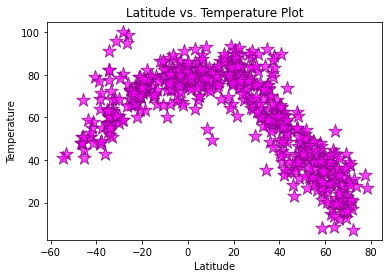

In [37]:
#Plot
plt.scatter(clean_city_data["Latitude"],clean_city_data["Max Temp"], marker="*", s=200,facecolors="magenta", edgecolors="purple",
            alpha=0.75)

plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#Output
plt.savefig("output_data/latvstemp.png")

In [38]:
#Analysis
#Temperature and latitude appear to be somewhat inversely related in this dataset, especially so for the northern hemisphere. 
#As latitude increases, the temperature falls, and vice versa

## Latitude vs. Humidity Plot

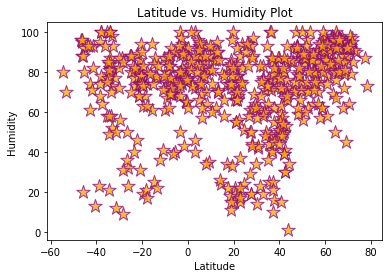

In [39]:
#Plot
plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity"], marker="*", s=200,facecolors="orange", edgecolors="purple",
            alpha=0.75)

plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Output
plt.savefig("output_data/latvshumid.png")

In [40]:
#Analysis
#The results appear to be somewhat random for the latitude versus humidity comparison. High humidity is prevelant along every
#latitude point.  Low humidity does seem to be more noticeable between the +/- 20 to 40 degree latitude range but not consistent
#enough to say the latitude is the determining factor.

## Latitude vs. Cloudiness Plot

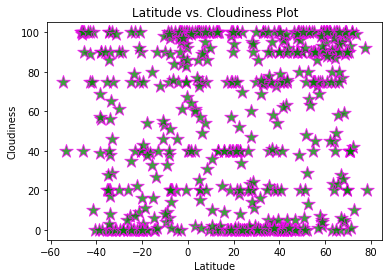

In [41]:
#Plot
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness"], marker="*", s=200,facecolors="green", edgecolors="magenta",
            alpha=0.75)

plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Output
plt.savefig("output_data/latvscloudy.png")

In [42]:
#Analysis
#The results are completely random for the latitude versus cloudiness comparison.

## Latitude vs. Wind Speed Plot

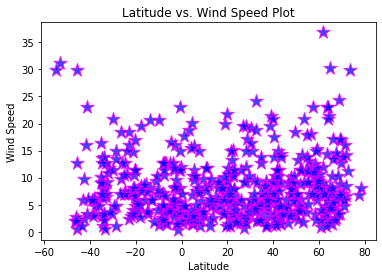

In [43]:
#Plot
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed"], marker="*", s=200,facecolors="blue", edgecolors="magenta",
            alpha=0.75)

plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#Output
plt.savefig("output_data/latvswindy.png")

In [44]:
#Analysis
#The results are completely random for the latitude versus wind speed comparison as well. Although, I must say, I would not
#visit that city represented by the lone little star in the 35mph range-if the Wizard of Oz is right that must be Kansas

## Linear Regression

In [54]:
#As a bonus, try to create a function that will create these charts based on different parameters.
#Not sure which hemisphere the equator would fall into so I just put it in northern to account for zero in the function
north_hem = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
south_hem = clean_city_data.loc[clean_city_data["Latitude"] < 0]
    
# Linear regression function
def linear_reg(x_value, y_value, hemisphere):

    # Hemisphere determination for axis values
    if hemisphere == "Northern":
        use = north_hem
    else:
        use = south_hem
    
    # X/Y values
    x = use[x_value]
    y = use[y_value]
    
    # Perform function
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, intercept + slope*x, 'r')
    r_sq = r_value*r_value
    r_sq = r_sq.round(decimals=9)
    
    plt.title(f"{hemisphere} hemisphere {y_value} vs. {x_value} Linear Regression")
    plt.xlabel(x_value)
    plt.ylabel(y_value)
    
    print(f"R-squared = {r_sq}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared = 0.764736476


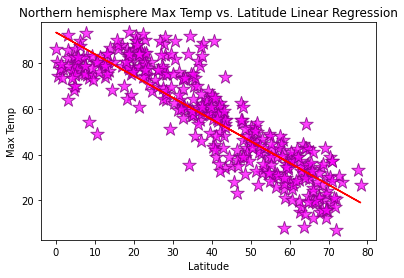

In [56]:
# Scatter plot for background
plt.scatter(north_hem["Latitude"],north_hem["Max Temp"], marker="*", s=200,facecolors="magenta", edgecolors="purple",
            alpha=0.75)

#Function values
x_value = "Latitude"
y_value = "Max Temp"
hemisphere = "Northern"

# Lineaer regression
fig = linear_reg(x_value, y_value, hemisphere)

#Output
plt.savefig("output_data/northtemp.png")

In [57]:
#Analysis
#There is a noticeable correlation between temperature and latitude shown in the linear regression model

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared = 0.462716866


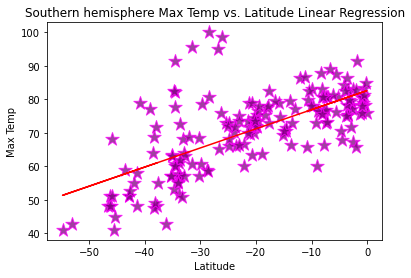

In [58]:
# Scatter plot for background
plt.scatter(south_hem["Latitude"],south_hem["Max Temp"], marker="*", s=200,facecolors="purple", edgecolors="magenta",
            alpha=0.75)
#Function values
x_value = "Latitude"
y_value = "Max Temp"
hemisphere = "Southern"
#Linear Regression
fig = linear_reg(x_value, y_value, hemisphere)
#Output
plt.savefig("output_data/southtemp.png")

In [ ]:
#Analysis
#There is a noticeable correlation between temperature and latitude shown in the linear regression model

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared = 0.074970848


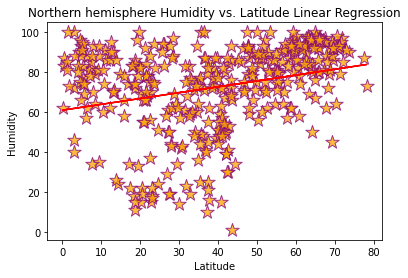

In [59]:
# Scatter plot for background
plt.scatter(north_hem["Latitude"],north_hem["Humidity"], marker="*", s=200,facecolors="orange", edgecolors="purple",
            alpha=0.75)
#Function values
x_value = "Latitude"
y_value = "Humidity"
hemisphere = "Northern"
#Linear Regression
fig = linear_reg(x_value, y_value, hemisphere)
#Output
plt.savefig("output_data/northhumid.png")

In [60]:
#Analysis
#There doesn't appear to be a correlation between humidity and latitude based on the linear regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared = 0.000168624


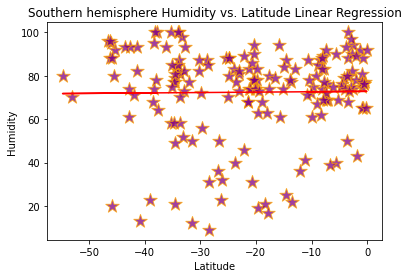

In [61]:
# Scatter plot for background
plt.scatter(south_hem["Latitude"],south_hem["Humidity"], marker="*", s=200,facecolors="purple", edgecolors="orange",
            alpha=0.75)
#Function values
x_value = "Latitude"
y_value = "Humidity"
hemisphere = "Southern"
#Linear Regression
fig = linear_reg(x_value, y_value, hemisphere)
#Output
plt.savefig("output_data/southhumid.png")

In [62]:
#Analysis
#There doesn't appear to be a correlation between humidity and latitude based on the linear regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared = 0.018989465


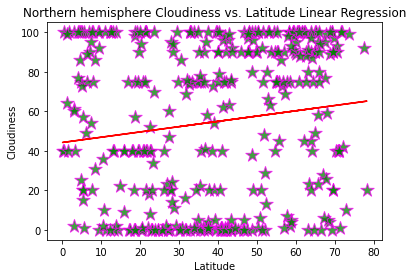

In [63]:
# Scatter plot for background
plt.scatter(north_hem["Latitude"],north_hem["Cloudiness"], marker="*", s=200,facecolors="green", edgecolors="magenta",
            alpha=0.75)
#Function values
x_value = "Latitude"
y_value = "Cloudiness"
hemisphere = "Northern"
#Linear Regression
fig = linear_reg(x_value, y_value, hemisphere)
#Output
plt.savefig("output_data/northcloudy.png")

In [64]:
#Analysis
#There doesn't appear to be a correlation between cloudiness and latitude based on the linear regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared = 0.017001831


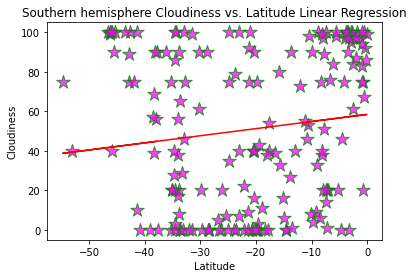

In [65]:
# Scatter plot for background
plt.scatter(south_hem["Latitude"],south_hem["Cloudiness"], marker="*", s=200,facecolors="magenta", edgecolors="green",
            alpha=0.75)
#Function values
x_value = "Latitude"
y_value = "Cloudiness"
hemisphere = "Southern"
#Linear Regression
fig = linear_reg(x_value, y_value, hemisphere)
#Output
plt.savefig("output_data/southcloudy.png")

In [66]:
#Analysis
#There doesn't appear to be a correlation between cloudiness and latitude based on the linear regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared = 0.037847442


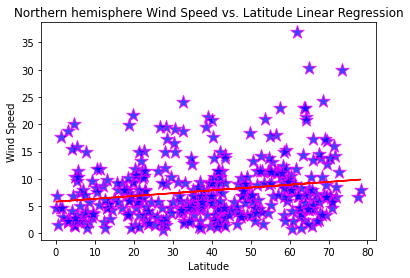

In [67]:
# Scatter plot for background
plt.scatter(north_hem["Latitude"],north_hem["Wind Speed"], marker="*", s=200,facecolors="blue", edgecolors="magenta",
            alpha=0.75)
#Function values
x_value = "Latitude"
y_value = "Wind Speed"
hemisphere = "Northern"
#Linear Regression
fig = linear_reg(x_value, y_value, hemisphere)
#Output
plt.savefig("output_data/northwindy.png")

In [68]:
#Analysis
#Just like the scatter plots showed, there doesn't appear to be a correlation between wind speed and latitude based on the 
#linear regression model

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared = 0.013873336


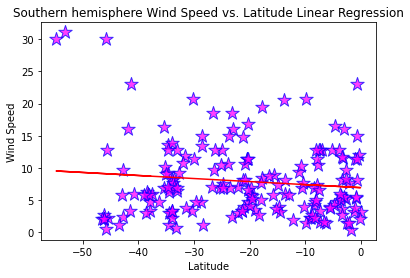

In [69]:
# Scatter plot for background
plt.scatter(south_hem["Latitude"],south_hem["Wind Speed"], marker="*", s=200,facecolors="magenta", edgecolors="blue",
            alpha=0.75)
#Function values
x_value = "Latitude"
y_value = "Wind Speed"
hemisphere = "Southern"
#Linear Regression
fig = linear_reg(x_value, y_value, hemisphere)
#Output
plt.savefig("output_data/southwindy.png")

In [ ]:
#Analysis
#Just like the scatter plots showed, there doesn't appear to be a correlation between wind speed and latitude based on the 
#linear regression model